In [2]:
import requests
import json

def analyzeText(url):
    api_url = "http://gateway-a.watsonplatform.net/calls/url/URLGetRankedNamedEntities"
    api_key = '3d0b6858f7ef32fdf27ad402f4a9c270c9685d84'
    headers = {
        "Accept": "application/json"
    }
    parameters = {
        'outputMode': 'json',
        'apikey' : api_key,
        'sentiment' : 1,
        'knowledgeGraph': 0,
        'url': url,
        'disambiguate': 0
    }
    resp = requests.post(api_url, params=parameters, headers=headers)
    data = json.loads(resp.text)
    
    return data


In [3]:
text_url = 'https://www.washingtonpost.com/politics/rubio-endures-an-assault-in-a-rollicking-republican-debate/2016/02/06/d8a9bd60-cc5b-11e5-a7b2-5a2f824b02c9_story.html'

results = analyzeText(text_url) 

In [4]:
results.keys()

[u'status', u'totalTransactions', u'language', u'url', u'entities', u'usage']

In [5]:
results["entities"]

[{u'count': u'20',
  u'relevance': u'0.940885',
  u'sentiment': {u'mixed': u'1', u'score': u'0.0465971', u'type': u'positive'},
  u'text': u'Donald Trump',
  u'type': u'Person'},
 {u'count': u'16',
  u'relevance': u'0.722885',
  u'sentiment': {u'score': u'-0.590129', u'type': u'negative'},
  u'text': u'Marco Rubio',
  u'type': u'Person'},
 {u'count': u'9',
  u'relevance': u'0.472516',
  u'sentiment': {u'score': u'-0.605079', u'type': u'negative'},
  u'text': u'Jeb Bush',
  u'type': u'Person'},
 {u'count': u'9',
  u'relevance': u'0.425278',
  u'sentiment': {u'mixed': u'1', u'score': u'-0.419991', u'type': u'negative'},
  u'text': u'Gov. Chris Christie',
  u'type': u'Person'},
 {u'count': u'13',
  u'relevance': u'0.419378',
  u'sentiment': {u'score': u'-0.308842', u'type': u'negative'},
  u'text': u'Sen. Ted Cruz',
  u'type': u'Person'},
 {u'count': u'5',
  u'relevance': u'0.343615',
  u'sentiment': {u'mixed': u'1', u'score': u'-0.322349', u'type': u'negative'},
  u'text': u'New Hampshir

In [7]:
import pandas
from pandas.io.json import json_normalize

df = json_normalize(results["entities"])
df.head(5)

,count,relevance,sentiment.mixed,sentiment.score,sentiment.type,text,type
0,20,0.940885,1,0.0465971,positive,Donald Trump,Person
1,16,0.722885,NaN,-0.590129,negative,Marco Rubio,Person
2,9,0.472516,NaN,-0.605079,negative,Jeb Bush,Person
3,9,0.425278,1,-0.419991,negative,Gov. Chris Christie,Person
4,13,0.419378,NaN,-0.308842,negative,Sen. Ted Cruz,Person


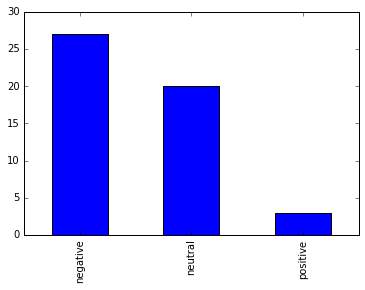

In [13]:
%matplotlib inline
df["sentiment.type"].value_counts().plot(kind='bar')

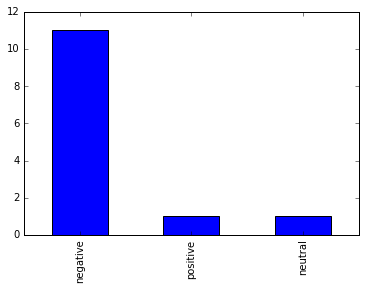

In [15]:
isPerson = (df["type"] == 'Person')
persons = df[isPerson]
persons["sentiment.type"].value_counts().plot(kind='bar')